## Observations and Insights 

Summary of the screening for potential treatments for squamous cell carcinoma (SCC)
Pymaceuticals specializes in anti-cancer pharmaceuticals had take effore to analyze the occurring form of skin cancer, SCC.

This study is consolidate from 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured.

#1. The number of data points for each Drug Regimen were more than 140. 
#2. The study had a near identical number of male and female mice.
#3. The Drug regimen of Capomulin was effective in reducing the average SCC tumor volume in mice over a 45 day period. 
#4. Based ont eh interested drugs choosen (Capomulin, Ramicane, Infubinol, and Ceftamin), Capomulin and Ramicane appeased to be effective.
#5. Mouse weight correlates mostly with average tumor volume.

In [1]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice in the DataFrame.
len(study_data_complete["Mouse ID"].unique())

# Checking unique number of mice
study_data_complete["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_ids[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
by_drug_regimen = clean_study_data_complete.groupby("Drug Regimen")
regimen_mean_tumor = round(by_drug_regimen["Tumor Volume (mm3)"].mean(),2)
regimen_median_tumor = round(by_drug_regimen["Tumor Volume (mm3)"].median(),2)
regimen_variance_tumor = round(by_drug_regimen["Tumor Volume (mm3)"].var(),2)
regimen_std_tumor = round(by_drug_regimen["Tumor Volume (mm3)"].std(),2)
regimen_sem_tumor = round(by_drug_regimen["Tumor Volume (mm3)"].sem(),2)


# This method is the most straightforward, creating multiple series and putting them all together at the end.
summary_tumor_vol = pd.DataFrame({ "Mean_tumor_volume_(mm3)": regimen_mean_tumor,
                                 "Median_tumor_volume_(mm3)": regimen_median_tumor,
                                 "Variance": regimen_variance_tumor,
                                 "Std_Deviation": regimen_std_tumor,
                                 "Std_Error": regimen_sem_tumor})

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

summary_tumor_vol.to_csv("pymaceutical_data.csv", index=False, header =True)
summary_tumor_vol

,Mean_tumor_volume_(mm3),Median_tumor_volume_(mm3),Variance,Std_Deviation,Std_Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

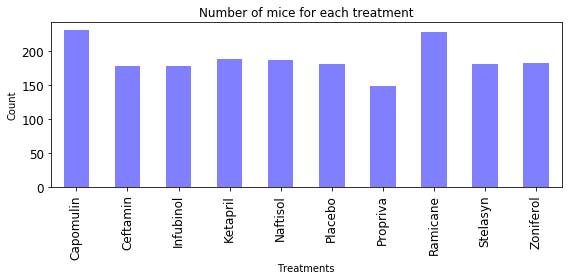

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drug_regimen = clean_study_data_complete.groupby("Drug Regimen")
count_mouse = drug_regimen["Mouse ID"].count()
drug_regimen_df = pd.DataFrame({"Count": count_mouse}) 

graph = count_mouse.plot(kind = 'bar', rot = 90, color='b', alpha=0.5, title='Number of mice for each treatment', fontsize=12,
                figsize=(8,4), label='Number of mice', legend=False)

graph.set_ylabel('Count')
graph.set_xlabel('Treatments')
plt.savefig("pyma_pandaBarChart.png", bbox_inches = "tight")
plt.tight_layout()


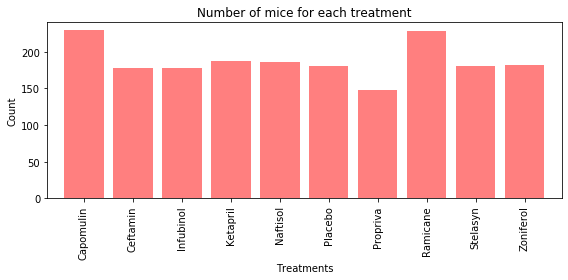

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(drug_regimen_df))

# index_drug_regimen
index_drug_regimen = drug_regimen_df.reset_index()
treatment = index_drug_regimen["Drug Regimen"]

plt.figure(figsize=(8,4))
plt.bar(treatment, drug_regimen_df["Count"], color='r', alpha=0.5)
plt.xticks(rotation='vertical') 
plt.title("Number of mice for each treatment")
plt.ylabel('Count')
plt.xlabel('Treatments')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_regimen_df["Count"])+10)
plt.savefig("pyma_pyplotBarChart.png", bbox_inches = "tight")
plt.tight_layout()

## Pie Plots

(-1.1079114197007642,
 1.1041200173094385,
 -1.1065502689644005,
 1.1003119175697333)

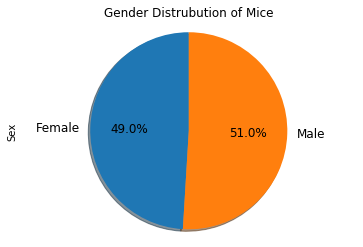

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_study_data_complete.groupby("Sex")
count = gender['Sex'].value_counts()
label = clean_study_data_complete["Sex"].unique()

count.plot(kind='pie', autopct="%1.1f%%", labels=label, title='Gender Distrubution of Mice',fontsize=12, startangle=90, shadow=True)
plt.savefig("pyma_pandaPieChart.png", bbox_inches = "tight")
plt.axis("equal")

(-1.1079114197007642,
 1.1041200173094385,
 -1.1065502689644005,
 1.1003119175697333)

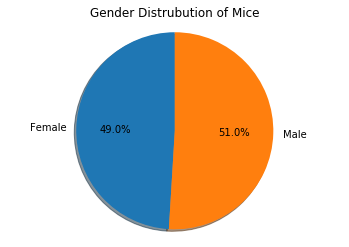

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count, autopct="%1.1f%%", labels=label, shadow=True, startangle=90)
plt.title('Gender Distrubution of Mice')
plt.savefig("pyma_pyplotPieChart.png", bbox_inches = "tight")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin, Ramicane, Infubinol, and Ceftamin

#List of drugs
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Call for dataframe of drugs from the list above
new_drug_regimen_df = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"].isin(regimens)] 

#Call for dataframe with final timepoint 
mouse_regimen_df = new_drug_regimen_df.loc[new_drug_regimen_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].idxmax()].round(2)                                        

#Dataframe with required coloums
druglist_df = mouse_regimen_df.loc[:,['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]

#Dataframe structure change, Drug Regimen from index to main column
tumor_vol_matrix = druglist_df.pivot(index='Mouse ID', columns='Drug Regimen', values='Tumor Volume (mm3)')

#Looping through listed drugs for the IQR data
for drug in regimens:
    quartiles = tumor_vol_matrix[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    median = quartiles[0.5].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
        
    print(f"IQR data for {drug}:")
    print(f"Lower quartile of {drug}: {lowerq}")
    print(f"Upper quartile of {drug}: {upperq}")
    print(f"Interquartile range of {drug}: {iqr}")
    print(f"Median of {drug}: {median} ")
    print(f"Values below {lower_bound} for {drug} are outliers.")
    print(f"Values above {upper_bound} for {drug} are outliers.\n")


IQR data for Capomulin:
Lower quartile of Capomulin: 32.38
Upper quartile of Capomulin: 40.16
Interquartile range of Capomulin: 7.78
Median of Capomulin: 38.13 
Values below 20.71 for Capomulin are outliers.
Values above 51.83 for Capomulin are outliers.

IQR data for Ramicane:
Lower quartile of Ramicane: 31.56
Upper quartile of Ramicane: 40.66
Interquartile range of Ramicane: 9.1
Median of Ramicane: 36.56 
Values below 17.91 for Ramicane are outliers.
Values above 54.31 for Ramicane are outliers.

IQR data for Infubinol:
Lower quartile of Infubinol: 54.05
Upper quartile of Infubinol: 65.53
Interquartile range of Infubinol: 11.48
Median of Infubinol: 60.17 
Values below 36.83 for Infubinol are outliers.
Values above 82.75 for Infubinol are outliers.

IQR data for Ceftamin:
Lower quartile of Ceftamin: 48.72
Upper quartile of Ceftamin: 64.3
Interquartile range of Ceftamin: 15.58
Median of Ceftamin: 59.85 
Values below 25.35 for Ceftamin are outliers.
Values above 87.67 for Ceftamin are o

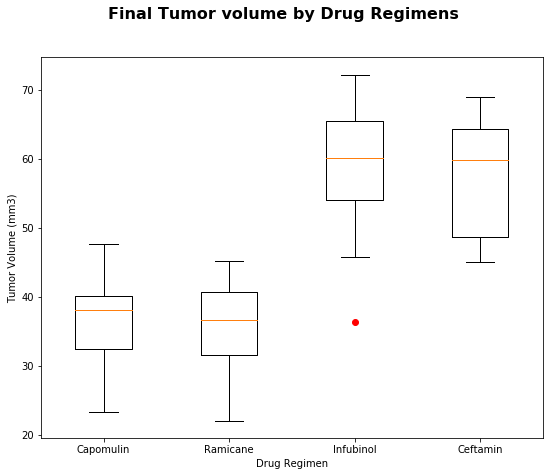

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = []

#Append the list of data for each drug  
for drug in regimens:
    plot_data.append(list(tumor_vol_matrix[drug].dropna()))

fig, ax = plt.subplots(figsize=(9,7))    
fig.suptitle("Final Tumor volume by Drug Regimens", fontsize=16, fontweight="bold")
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(plot_data, sym='ro')
plt.xticks([1,2,3,4],regimens)
plt.savefig("pyma_boxplot.png", bbox_inches = "tight")

## Line and Scatter Plots

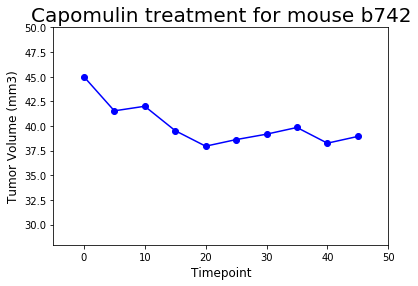

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# DataFrame for Mouse ID b742 with Capomulin treatment
a_mouse_df = clean_study_data_complete.loc[(clean_study_data_complete['Drug Regimen'] == "Capomulin") & (clean_study_data_complete['Mouse ID'] == "b742")]

# line plot
plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(a_mouse_df["Timepoint"], a_mouse_df["Tumor Volume (mm3)"], marker="o",c="b")
plt.title('Capomulin treatment for mouse b742', fontsize=20)
plt.xlabel('Timepoint',fontsize=12)
plt.ylabel('Tumor Volume (mm3)',fontsize=12)
plt.xlim([min(a_mouse_df["Timepoint"])-5,max(a_mouse_df["Timepoint"]+5)])
plt.ylim([min(a_mouse_df["Tumor Volume (mm3)"])-10,max(a_mouse_df["Tumor Volume (mm3)"]+5)])
plt.savefig("pyma_linegraph.png", bbox_inches = "tight")

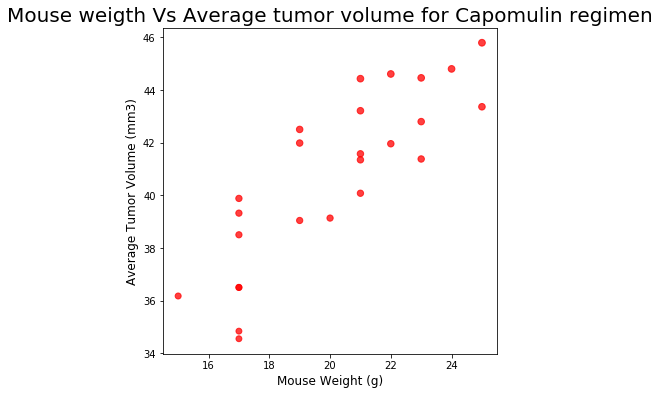

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_df = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == "Capomulin"]
cap_tumor_avg = cap_df.groupby("Mouse ID").mean()

plt.figure(figsize=(6,6))
plt.scatter(cap_tumor_avg['Weight (g)'],cap_tumor_avg['Tumor Volume (mm3)'], c='r', marker='o', s=cap_tumor_avg['Tumor Volume (mm3)'], alpha=0.75)
plt.title('Mouse weigth Vs Average tumor volume for Capomulin regimen', fontsize=20)
plt.xlabel('Mouse Weight (g)',fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=12)
plt.savefig("pyma_scatterplot.png", bbox_inches = "tight")

## Correlation and Regression

The correlation coefficient for Capomulin regimen Mouse weight vs Avg. tumor volume is 0.84
r-squared value: 0.71
Equation of the regression line: y = 0.95x + 21.55


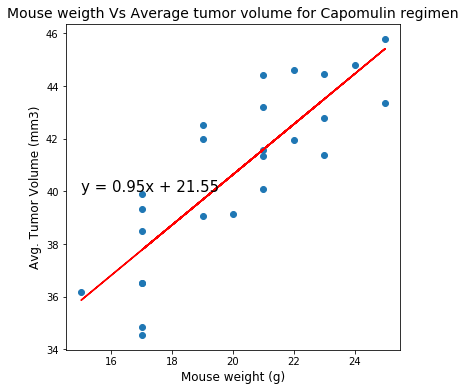

In [17]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(cap_tumor_avg['Weight (g)'], cap_tumor_avg['Tumor Volume (mm3)'])
print(f"The correlation coefficient for Capomulin regimen Mouse weight vs Avg. tumor volume is {round(correlation[0],2)}")


x_values = cap_tumor_avg['Weight (g)']
y_values = cap_tumor_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = (f'y = {str(round(slope,2))}x + {str(round(intercept,2))}')

plt.figure(figsize=(6,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(15,40),fontsize=15,color="black")


plt.title("Mouse weigth Vs Average tumor volume for Capomulin regimen", fontsize=14)
plt.xlabel("Mouse weight (g)", fontsize=12)
plt.ylabel("Avg. Tumor Volume (mm3)", fontsize=12)
plt.savefig("pyma_scatterplot with linear_regression.png", bbox_inches = "tight")

# r-squared value 
print(f"r-squared value: {round(rvalue**2,2)}")
print(f"Equation of the regression line: {line_eq}")